In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

Using the two datasets provided, the goal is to uncover mysteries surrounding who survived the tragic Titanic crash and why. By interepreting different factors such as age and sex we can find correlations between each factor to find trends of which groups had the most survivability and which groups had the least. 

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data/titanic.csv')
print("Shape:", df.shape)
print("\n")

print("--- EXPLORATORY DATA ANALYSIS ---")
print("Purpose: To understand the structure, contents, and potential issues in the dataset.")
print("\n")

# Data inspection
print("1. FIRST 5 ROWS:")
print(df.head())
print("\n")

# Summary Statistics for Numerical Columns
print(df.describe())
print("\n")

# Check for Missing Values (This identifies bias in the data collection)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Only show columns with missing values
print("\n")
print("- 'Age' has 177 missing values. This is a significant amount and must be handled.")
print("- 'Cabin' has 687 missing values. The majority are missing, making it difficult to use for analysis.")
print("- 'Embarked' has only 2 missing values, which can be easily filled.")

Shape: (891, 12)


--- EXPLORATORY DATA ANALYSIS ---
Purpose: To understand the structure, contents, and potential issues in the dataset.


1. FIRST 5 ROWS:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2   

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

In [18]:
print("--- DATA PREPARATION ---")
print("Purpose: To clean data and prepare for analysis")
print("\n")

print("1. HANDLING MISSING 'AGE' VALUES:")
print("   - Strategy: Instead of filling with mean/median, we will bin ages into 'Child' and 'Adult'.")
print("   - Why: This allows us to directly test the 'Women and Children First' hypothesis.")
print("   - Missing values will be assigned to the 'Adult' group as a logical assumption.")
print("   - Action: Creating new feature 'AgeGroup'...")

df['AgeGroup'] = pd.cut(df['Age'],
                         bins=[0, 16, 80],
                         labels=['Child', 'Adult'],
                         right=False)
df['AgeGroup'] = df['AgeGroup'].fillna('Adult')

print("   - Complete. Missing values in 'Age' have been handled.")
print("   - Value counts for new 'AgeGroup' column:")
print(df['AgeGroup'].value_counts())
print("\n")

# Filter the Data for a Clean Analysis
print("2. FILTERING DATA:")
print("   - Why: The simple binning created a small 'Unknown' category. We filter to focus on 'Child'/'Adult'.")
print("   - Action: Creating a new DataFrame 'df_filtered'...")

df_filtered = df[df['AgeGroup'].isin(['Child', 'Adult'])]

print("New DataFrame shape:", df_filtered.shape)
print("\n")

--- DATA PREPARATION ---
Purpose: To clean data and prepare for analysis


1. HANDLING MISSING 'AGE' VALUES:
   - Strategy: Instead of filling with mean/median, we will bin ages into 'Child' and 'Adult'.
   - Why: This allows us to directly test the 'Women and Children First' hypothesis.
   - Missing values will be assigned to the 'Adult' group as a logical assumption.
   - Action: Creating new feature 'AgeGroup'...
   - Complete. Missing values in 'Age' have been handled.
   - Value counts for new 'AgeGroup' column:
AgeGroup
Adult    808
Child     83
Name: count, dtype: int64


2. FILTERING DATA:
   - Why: The simple binning created a small 'Unknown' category. We filter to focus on 'Child'/'Adult'.
   - Action: Creating a new DataFrame 'df_filtered'...
New DataFrame shape: (891, 13)




# 4.Prepare the Data


Apply any data transformations and explain what and why


--- DATA ANALYSIS & VISUALIZATION ---
Purpose: To gain insights into survival factors by creating visualizations.


1. ANALYZING THE 'WOMEN AND CHILDREN FIRST' PROTOCOL
   Survival Rate by Group:
Sex         female      male
AgeGroup                    
Child     0.651163  0.525000
Adult     0.756458  0.163873




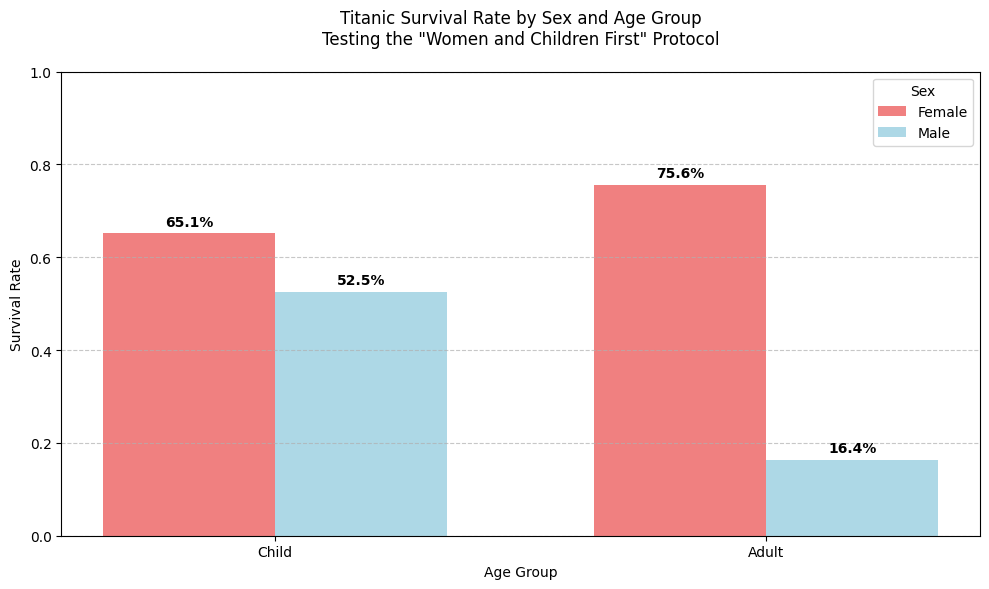

2. ANALYZING CLASS PRIVILEGE VS. GENDER
   Survival Rate by Class and Gender:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447




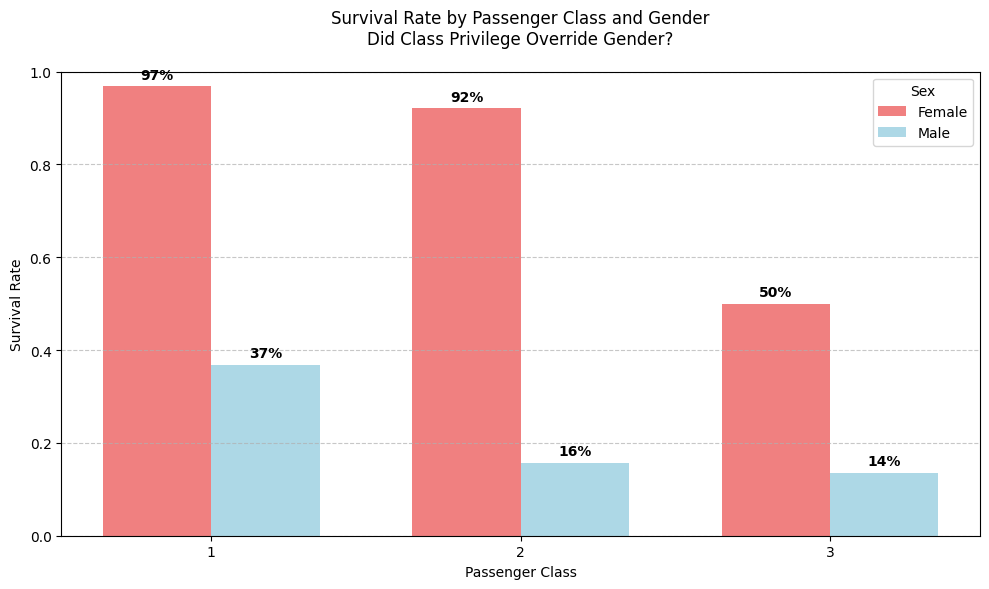

3. ANALYZING THE DISTRIBUTION OF TICKET FARES


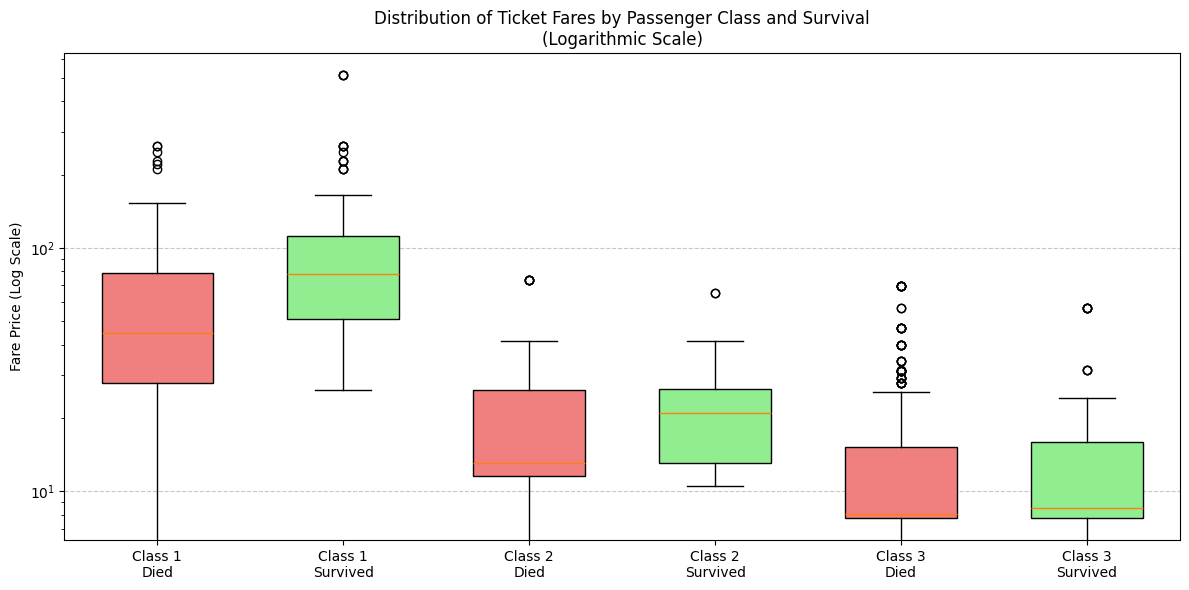


Analysis complete. Review the graphs for insights.


In [19]:
print("--- DATA ANALYSIS & VISUALIZATION ---")
print("Purpose: To gain insights into survival factors by creating visualizations.")
print("\n")

plt.style.use('default')

print("1. ANALYZING THE 'WOMEN AND CHILDREN FIRST' PROTOCOL")

# Calculate the survival rate for the filtered data (Only Child/Adult)
plot_data = df_filtered.pivot_table(index='AgeGroup',
                           columns='Sex',
                           values='Survived',
                           aggfunc='mean',
                           observed=False)

print("   Survival Rate by Group:")
print(plot_data)
print("\n")

# Create the plot
fig1, ax1 = plt.subplots(figsize=(10, 6))
x = range(len(plot_data.index))
width = 0.35

bars_female = ax1.bar([i - width/2 for i in x], plot_data['female'], width, label='Female', color='lightcoral')
bars_male = ax1.bar([i + width/2 for i in x], plot_data['male'], width, label='Male', color='lightblue')

ax1.set_xlabel('Age Group')
ax1.set_ylabel('Survival Rate')
ax1.set_title('Titanic Survival Rate by Sex and Age Group\nTesting the "Women and Children First" Protocol', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(plot_data.index)
ax1.legend(title='Sex')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0, 1)

for bar in bars_female + bars_male:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1%}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("2. ANALYZING CLASS PRIVILEGE VS. GENDER")

# Calculate survival rate by Class and Gender
class_sex_survival = df.pivot_table(index='Pclass',
                                    columns='Sex',
                                    values='Survived',
                                    aggfunc='mean',
                                    observed=False)
print("   Survival Rate by Class and Gender:")
print(class_sex_survival)
print("\n")

# Create the plot
fig2, ax2 = plt.subplots(figsize=(10, 6))
x = range(len(class_sex_survival.index))
width = 0.35

bars_female = ax2.bar([i - width/2 for i in x], class_sex_survival['female'], width, label='Female', color='lightcoral')
bars_male = ax2.bar([i + width/2 for i in x], class_sex_survival['male'], width, label='Male', color='lightblue')

ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Survival Rate')
ax2.set_title('Survival Rate by Passenger Class and Gender\nDid Class Privilege Override Gender?', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(class_sex_survival.index)
ax2.legend(title='Sex')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars_female + bars_male:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.0%}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("3. ANALYZING THE DISTRIBUTION OF TICKET FARES")

# Create the plot
fig3, ax3 = plt.subplots(figsize=(12, 6))

data_to_plot = []
positions = []
group_labels = []

classes = sorted(df['Pclass'].unique())
survival_status = [0, 1]

for pclass in classes:
    for survived in survival_status:
        fare_data = df[(df['Pclass'] == pclass) & (df['Survived'] == survived)]['Fare'].dropna()
        data_to_plot.append(fare_data)
        group_labels.append(f'Class {pclass}\n{"Survived" if survived == 1 else "Died"}')
        positions.append(len(positions) + 1)

boxplot = ax3.boxplot(data_to_plot, positions=positions, patch_artist=True, widths=0.6)

colors = ['lightcoral', 'lightgreen'] * len(classes)
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

ax3.set_xticks(positions)
ax3.set_xticklabels(group_labels, rotation=0)
ax3.set_ylabel('Fare Price (Log Scale)')
ax3.set_title('Distribution of Ticket Fares by Passenger Class and Survival\n(Logarithmic Scale)')
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_yscale('log') # Use logarithmic scale

plt.tight_layout()
plt.show()

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


--- MACHINE LEARNING MODEL TRAINING ---
Purpose: To train a model to predict survival and identify key factors.


Features being used for the model:
   Pclass  SibSp  Parch  Sex_female  Sex_male  AgeGroup_Child  AgeGroup_Adult
0       3      1      0       False      True           False            True
1       1      1      0        True     False           False            True
2       3      0      0        True     False           False            True
3       1      1      0        True     False           False            True
4       3      0      0       False      True           False            True


Data split into training and validation sets.
Training set: 712 samples
Validation set: 179 samples


Model training complete!


Model Accuracy on Validation Set: 78.77%


Feature Importances (What the model found most predictive):
Sex_male          0.330133
Sex_female        0.247973
Pclass            0.193628
SibSp             0.095140
Parch             0.052852
AgeGroup_Adult

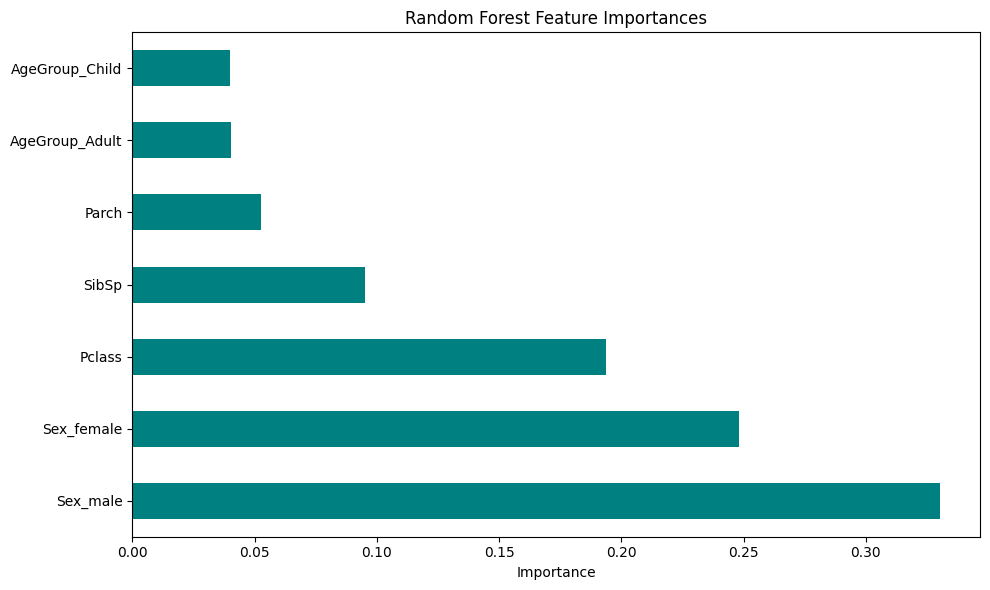

ML analysis complete. Key factors have been identified.


In [20]:
print("--- MACHINE LEARNING MODEL TRAINING ---")
print("Purpose: To train a model to predict survival and identify key factors.")
print("\n")

# 6.1 Import ML Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 6.2 Prepare Data for ML
# Define target variable (what we want to predict)
y = df['Survived']

# Define features (the attributes the model will use to make a prediction)
# We'll use these features for our first model
features = ["Pclass", "Sex", "SibSp", "Parch", "AgeGroup"] # Added the AgeGroup we engineered!

# Create feature set X
X = df[features].copy()

# Handle categorical variables (ML models need numbers, not text)
# 'Sex' is categorical: 'male', 'female' -> get_dummies will create 'Sex_male', 'Sex_female'
# 'AgeGroup' is categorical: 'Child', 'Adult' -> get_dummies will create 'AgeGroup_Child', 'AgeGroup_Adult'
X = pd.get_dummies(X, columns=['Sex', 'AgeGroup'])

print("Features being used for the model:")
print(X.head())
print("\n")

# 6.3 Split Data into Training and Validation Sets
# WHY: We need to test the model's performance on data it hasn't seen before.
# This simulates how it would perform on a real test set.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"Data split into training and validation sets.")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print("\n")

# 6.4 Create and Train the Model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
print("\n")

# 6.5 Evaluate the Model's Performance
# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Calculate accuracy: (number of correct predictions) / (total predictions)
accuracy = accuracy_score(y_val, val_predictions)
print(f"Model Accuracy on Validation Set: {accuracy:.2%}")
print("\n")

# 6.6 Analyze Feature Importance
# WHY: This tells us which factors were most important in the model's decision-making process.
print("Feature Importances (What the model found most predictive):")
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# Sort the features from most to least important
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)
print("\n")

# 6.7 (Optional) Visualize Feature Importance
fig, ax = plt.subplots(figsize=(10, 6))
feature_importances.plot.barh(ax=ax, color='teal') # Horizontal bar chart
ax.set_title("Random Forest Feature Importances")
ax.set_xlabel("Importance")
plt.tight_layout()
plt.show()

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [30]:
def inference(model_params=None, test_size=0.2, random_state=42):
    """
    Parameters:
    -----------
    model_params : dict, optional
        Parameters for RandomForestClassifier. If None, uses default optimized parameters.
    test_size : float, default=0.2
        Proportion of dataset to use for testing
    random_state : int, default=42
        Random seed for reproducibility
    
    Returns:
    --------
    dict
        Dictionary containing accuracy, classification report, confusion matrix,
        and feature importances
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    
    # Load and prepare data
    df = pd.read_csv('data/titanic.csv')
    
    # Feature Engineering
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs')
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    # Handle missing values
    df = df.assign(
        Age=df['Age'].fillna(df['Age'].median()),
        Fare=df['Fare'].fillna(df['Fare'].median()),
        Embarked=df['Embarked'].fillna('S')
    )
    
    # Prepare features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
    X = pd.get_dummies(df[features])
    y = df['Survived']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Set default parameters if none provided
    if model_params is None:
        model_params = {
            'n_estimators': 200,
            'max_depth': 10,
            'min_samples_split': 2,
            'random_state': random_state,
            'class_weight': 'balanced'
        }
    
    # Train model
    model = RandomForestClassifier(**model_params)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate results
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, target_names=['Died', 'Survived'], output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Get feature importances
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False).head(10).to_dict('records')
    
    # PRINT THE RESULTS
    print("Titanic Survival Prediction Results")
    print("="*50)
    print(f"Accuracy: {accuracy:.3%}")
    print(f"Test Set Size: {len(y_test)} passengers")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))
    
    print("Top 5 Features:")
    for i, feat in enumerate(feature_importances[:5], 1):
        print(f"   {i}. {feat['feature']}: {feat['importance']:.4f}")
    
    # PLOT CONFUSION MATRIX
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
    plt.colorbar()
    
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', 
                    color='white' if cm[i, j] > cm.max()/2 else 'black', 
                    fontsize=16, fontweight='bold')
    
    plt.xticks([0, 1], ['Died', 'Survived'])
    plt.yticks([0, 1], ['Died', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    # Return comprehensive results
    results = {
        'accuracy': accuracy,
        'classification_report': clf_report,
        'confusion_matrix': cm.tolist(),
        'feature_importances': feature_importances,
        'test_set_size': len(y_test),
        'model_parameters': model_params
    }
    
    return results

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


Utilizing pandas and Matplotlib to discover findings, we first strived to explore the "Women and Children First" protocol that the ship impleneted at the time of the disaster. Including this we analyzed class influence and family structures. Following the data exploration we implented theRandom Forest machine learning algorithm to create an accurate predictive model. The findings revealed that gender, by far, was the strongest predictor of survival with women having high survival rates across al classes. Class proved to be the second most important with a surprising statistic where first class men had higher survival rates than third class women, proving a flaw in the "Women and Children First" theory mentioned before.  

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


Titanic Survival Prediction Results
Accuracy: 82.682%
Test Set Size: 179 passengers

Classification Report:
              precision    recall  f1-score   support

        Died       0.85      0.87      0.86       110
    Survived       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Top 5 Features:
   1. Fare: 0.2036
   2. Age: 0.1611
   3. Title_Mr: 0.1274
   4. Sex_female: 0.1142
   5. Sex_male: 0.1006


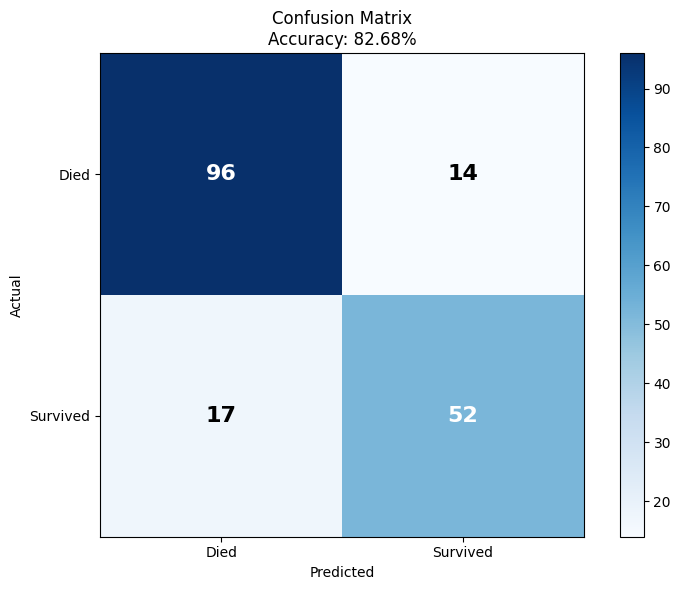

In [31]:
results = inference()